In [1]:
import mesa
import mesa_geo as mg

In [2]:
import requests

url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_STADSDEEL&THEMA=gebiedsindeling"
r = requests.get(url)
geojson_ams = r.json()

In [9]:
class State(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs):
        super().__init__(unique_id, model, geometry, crs)


class GeoModel(mesa.Model):
    def __init__(self):
        self.space = mg.GeoSpace()

        ac = mg.AgentCreator(agent_class=State, model=self)
        agents = ac.from_GeoJSON(GeoJSON=geojson_ams, unique_id="Stadsdeel")
        self.space.add_agents(agents)

Centrum


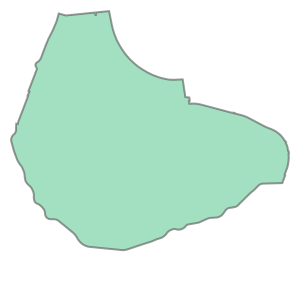

In [11]:
m = GeoModel()

agent = m.space.agents[0]
print(agent.unique_id)
agent.geometry

In [12]:
neighbors = m.space.get_neighbors(agent)
print([a.unique_id for a in neighbors])

['Zuid', 'Oost', 'Noord', 'West']


In [13]:
[a.unique_id for a in m.space.get_neighbors_within_distance(agent, 600000)]

['Nieuw-West',
 'Westpoort',
 'West',
 'Zuid',
 'Centrum',
 'Oost',
 'Noord',
 'Zuidoost',
 'Weesp']